In [2]:
# URL of S3 bucket
BASE_URL = "https://object-store.os-api.cci1.ecmwf.int/esiwacebucket"

In [3]:
import dask
import requests
import aiohttp
import humanize
dask.config.set(array__chunk_size="4MiB");

In [4]:
import sys
sys.path.insert(0, "..")
import utils

In [5]:
filename = "slo1802_atm_2d_ml_20200101T000000Z.nc"
import kerchunk.hdf
url = f"{BASE_URL}/ICON-XPP/{filename}"
print(url)
kc = kerchunk.hdf.SingleHdf5ToZarr(
    url,
    inline_threshold=0, error="raise", storage_options=dict(block_size=512),
).translate()

kc = utils.kerchunk_autochunk(kc, chunk_size=2**22)  # 4MiB

https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/ICON-XPP/slo1802_atm_2d_ml_20200101T000000Z.nc


OSError: Unable to open file (file signature not found)

In [10]:
import xarray as xr
from pathlib import Path
ds1 = xr.open_dataset(Path("~/Downloads/slo1802_atm_2d_ml_20200101T000000Z.nc"))
display(ds1)

<xarray.Dataset>
Dimensions:        (time: 60, ncells: 81920, vertices: 3, height: 1, height_2: 1)
Coordinates:
  * time           (time) datetime64[ns] 2020-02-01 2020-03-01 ... 2025-01-01
    clon           (ncells) float64 ...
    clat           (ncells) float64 ...
  * height         (height) float64 10.0
  * height_2       (height_2) float64 2.0
Dimensions without coordinates: ncells, vertices
Data variables: (12/40)
    clon_bnds      (ncells, vertices) float64 ...
    clat_bnds      (ncells, vertices) float64 ...
    pres_msl       (time, ncells) float32 ...
    pres_sfc       (time, ncells) float32 ...
    t_s            (time, ncells) float32 ...
    clct           (time, ncells) float32 ...
    ...             ...
    t_ice          (time, ncells) float32 ...
    h_ice          (time, ncells) float32 ...
    albvisdif      (time, ncells) float32 ...
    albvisdir      (time, ncells) float32 ...
    albnirdif      (time, ncells) float32 ...
    albnirdir      (time, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 2.4.0 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  30
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/ic...
    uuidOfHGrid:          a668eac0-fe2e-11e4-9a47-e3e5371a87a7
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-mpim.git@fba959455f42c...
    history:              /work/mh0287/m211032/Icon/Git_lev/icon.XPP.20240717...
    references:           see MPIM/DWD publications
    comment:              Stephan Lorenz (m211032) on l20308 (Linux 4.18.0-47...

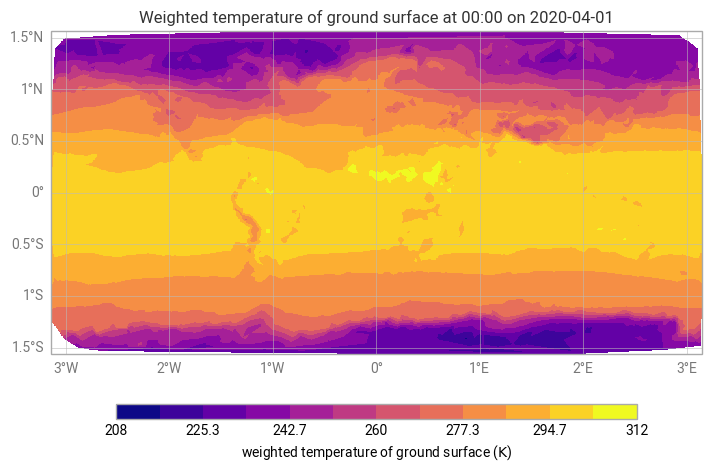

In [13]:
import cftime
import numpy as np
import pandas as pd
import earthkit.plots
import earthkit.plots.quickmap

# Function to convert cftime to numpy.datetime64
def convert_cftime_to_npdatetime(cftime_obj):
    if isinstance(cftime_obj, cftime.datetime):
        return np.datetime64(cftime_obj.strftime('%Y-%m-%d %H:%M:%S'))
    return cftime_obj

converted_time_values = np.array([convert_cftime_to_npdatetime(dt) for dt in ds1['t_s']['time'].values])

# Update the dataset with the converted time values
ds1 = ds1.assign_coords(time=("time", converted_time_values))

# Plotting
earthkit.plots.quickmap.plot(
    ds1["t_s"].sel(time=np.datetime64("2020-04-01 00:00:00"))[::10], 
    units="degC", x="clon", y="clat"
)


In [15]:
ds2 = xr.open_dataset(Path("~/Downloads/slo1802_atm_2d_ml_13000101T000000Z.nc"))
display(ds2)

/Users/ecm5945/Documents/ECMWF/Code/data_compression/venv/lib/python3.10/site-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/ecm5945/Documents/ECMWF/Code/data_compression/venv/lib/python3.10/site-packages/xarray/core/indexing.py:560: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


<xarray.Dataset>
Dimensions:        (time: 60, ncells: 81920, vertices: 3, height: 1, height_2: 1)
Coordinates:
  * time           (time) object 1300-02-01 00:00:00 ... 1305-01-01 00:00:00
    clon           (ncells) float64 ...
    clat           (ncells) float64 ...
  * height         (height) float64 10.0
  * height_2       (height_2) float64 2.0
Dimensions without coordinates: ncells, vertices
Data variables: (12/40)
    clon_bnds      (ncells, vertices) float64 ...
    clat_bnds      (ncells, vertices) float64 ...
    pres_msl       (time, ncells) float32 ...
    pres_sfc       (time, ncells) float32 ...
    t_s            (time, ncells) float32 ...
    clct           (time, ncells) float32 ...
    ...             ...
    t_ice          (time, ncells) float32 ...
    h_ice          (time, ncells) float32 ...
    albvisdif      (time, ncells) float32 ...
    albvisdir      (time, ncells) float32 ...
    albnirdif      (time, ncells) float32 ...
    albnirdir      (time, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 2.4.0 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  30
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/ic...
    uuidOfHGrid:          a668eac0-fe2e-11e4-9a47-e3e5371a87a7
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-mpim.git@fba959455f42c...
    history:              /work/mh0287/m211032/Icon/Git_lev/icon.XPP.20240717...
    references:           see MPIM/DWD publications
    comment:              Stephan Lorenz (m211032) on l10451 (Linux 4.18.0-47...

TypeError: <class 'cftime._cftime.DatetimeGregorian'> is not convertible to datetime, at position 0

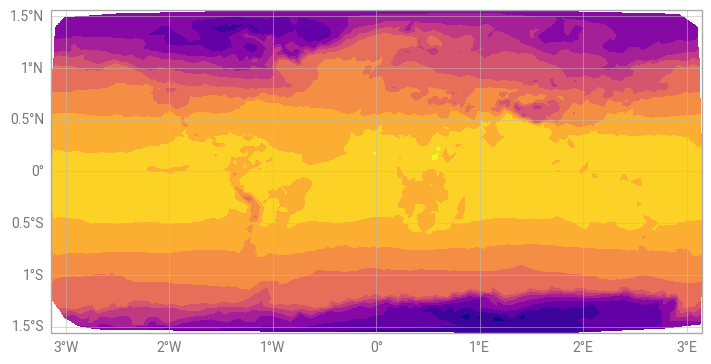

In [20]:
earthkit.plots.quickmap.plot( ds2["t_s"].sel(time=cftime.DatetimeGregorian(1300, 4, 1, 0, 0, 0))[::10], 
                             units="degC", x="clon", y="clat" )

In [17]:
converted_time_values2 = np.array([convert_cftime_to_npdatetime(dt) for dt in ds2['t_s']['time'].values])

# Update the dataset with the converted time values
ds2 = ds2.assign_coords(time=("time", converted_time_values2))

# Plotting
earthkit.plots.quickmap.plot(
    ds2["t_s"].sel(time=np.datetime64("1300-04-01 00:00:00"))[::10], 
    units="degC", x="clon", y="clat"
)

/var/folders/yk/ynndwgjs2sjc8ffm43b35lxc0000gn/T/ipykernel_23513/2956963794.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds2 = ds2.assign_coords(time=("time", converted_time_values2))


OutOfBoundsDatetime: Variable 'time': Could not convert tuple of form (dims, data[, attrs, encoding]): ('time', array(['1300-02-01T00:00:00', '1300-03-01T00:00:00',
       '1300-04-01T00:00:00', '1300-05-01T00:00:00',
       '1300-06-01T00:00:00', '1300-07-01T00:00:00',
       '1300-08-01T00:00:00', '1300-09-01T00:00:00',
       '1300-10-01T00:00:00', '1300-11-01T00:00:00',
       '1300-12-01T00:00:00', '1301-01-01T00:00:00',
       '1301-02-01T00:00:00', '1301-03-01T00:00:00',
       '1301-04-01T00:00:00', '1301-05-01T00:00:00',
       '1301-06-01T00:00:00', '1301-07-01T00:00:00',
       '1301-08-01T00:00:00', '1301-09-01T00:00:00',
       '1301-10-01T00:00:00', '1301-11-01T00:00:00',
       '1301-12-01T00:00:00', '1302-01-01T00:00:00',
       '1302-02-01T00:00:00', '1302-03-01T00:00:00',
       '1302-04-01T00:00:00', '1302-05-01T00:00:00',
       '1302-06-01T00:00:00', '1302-07-01T00:00:00',
       '1302-08-01T00:00:00', '1302-09-01T00:00:00',
       '1302-10-01T00:00:00', '1302-11-01T00:00:00',
       '1302-12-01T00:00:00', '1303-01-01T00:00:00',
       '1303-02-01T00:00:00', '1303-03-01T00:00:00',
       '1303-04-01T00:00:00', '1303-05-01T00:00:00',
       '1303-06-01T00:00:00', '1303-07-01T00:00:00',
       '1303-08-01T00:00:00', '1303-09-01T00:00:00',
       '1303-10-01T00:00:00', '1303-11-01T00:00:00',
       '1303-12-01T00:00:00', '1304-01-01T00:00:00',
       '1304-02-01T00:00:00', '1304-03-01T00:00:00',
       '1304-04-01T00:00:00', '1304-05-01T00:00:00',
       '1304-06-01T00:00:00', '1304-07-01T00:00:00',
       '1304-08-01T00:00:00', '1304-09-01T00:00:00',
       '1304-10-01T00:00:00', '1304-11-01T00:00:00',
       '1304-12-01T00:00:00', '1305-01-01T00:00:00'],
      dtype='datetime64[s]')) to Variable.